In [2]:
import pandas as pd

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

# Tabular data

In [4]:
# Here is just the sample dir, you should correct your dir
df = pd.read_csv("titanic.csv")

## Practice 1

**Print out top rows in the data**

In [5]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

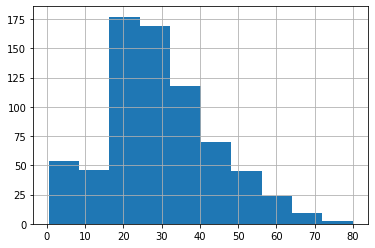

In [6]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

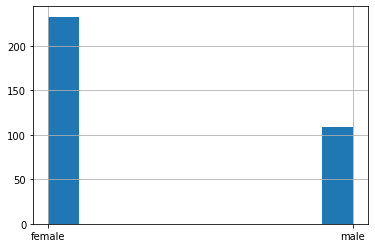

In [11]:
d = df.loc[df['Survived'] ==1]
d['Sex'].hist()

**Or how does it differ between the different classes?**

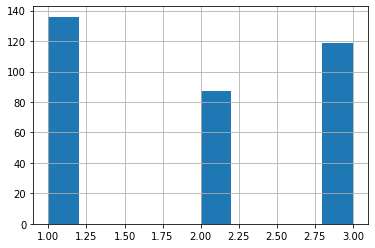

In [12]:
d['Pclass'].hist()

**Are young people more likely to survive?**

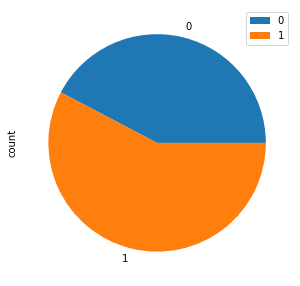

In [43]:
Child_sur= df[df['Age'] < 15]
c = pd.crosstab(index=Child_sur['Survived'], columns='count')
c.plot.pie(y ='count',figsize=(5, 5))
#Yes

All the needed functionality for the above examples will be explained throughout this tutorial.

# Data structures

Pandas provides two fundamental data objects, for 1D (``Series``) and 2D data (``DataFrame``).

## Series

A Series is a basic holder for **one-dimensional labeled data**. It can be created much as a NumPy array is created:

In [ ]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

### Attributes of a Series: `index` and `values`

The series has a built-in concept of an **index**, which by default is the numbers *0* through *N - 1*

In [ ]:
s.index

RangeIndex(start=0, stop=4, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [ ]:
s.values

array([ 0.1,  0.2,  0.3,  0.4])

We can access series values via the index, just like for NumPy arrays:

In [ ]:
s[0]

0.10000000000000001

Unlike the NumPy array, though, this index can be something other than integers:

In [ ]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [ ]:
s2['c']

2

In this way, a ``Series`` object can be thought of as similar to an ordered dictionary mapping one typed value to another typed value.

In fact, it's possible to construct a series directly from a Python dictionary:

In [ ]:
pop_dict = {'Germany': 81.3, 
            'Belgium': 11.3, 
            'France': 64.3, 
            'United Kingdom': 64.9, 
            'Netherlands': 16.9}
population = pd.Series(pop_dict)
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

We can index the populations like a dict as expected:

In [ ]:
population['France']

64.299999999999997

but with the power of numpy arrays:

In [ ]:
population * 1000

Belgium           11300.0
France            64300.0
Germany           81300.0
Netherlands       16900.0
United Kingdom    64900.0
dtype: float64

## DataFrames: Multi-dimensional Data

A DataFrame is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


One of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [ ]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [ ]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

To check the data types of the different columns:

In [ ]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

An overview of that information can be given with the `info()` method:

In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [ ]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

If we don't like what the index looks like, we can reset it and set one of our columns:

In [ ]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


To access a Series representing a column in the data, use typical indexing syntax:

In [ ]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

# Basic operations on Series/Dataframes

As you play around with DataFrames, you'll notice that many operations which work on NumPy arrays will also work on dataframes.


In [ ]:
# redefining the example objects

population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9})

countries = pd.DataFrame({'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']})

### Elementwise-operations (like numpy)

Just like with numpy arrays, many operations are element-wise:

In [ ]:
population / 100

Belgium           0.113
France            0.643
Germany           0.813
Netherlands       0.169
United Kingdom    0.649
dtype: float64

In [ ]:
countries['population'] / countries['area']

0    0.000370
1    0.000096
2    0.000228
3    0.000407
4    0.000265
dtype: float64

### Alignment! (unlike numpy)

Only, pay attention to **alignment**: operations between series will align on the index:  

In [ ]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [ ]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [ ]:
s2

France     64.3
Germany    81.3
dtype: float64

In [ ]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

### Reductions (like numpy)

The average population number:

In [ ]:
population.mean()

47.739999999999995

The minimum area:

In [ ]:
countries['area'].min()

30510

For dataframes, often only the numeric columns are included in the result:

In [ ]:
countries.median()

area          244820.0
population        64.3
dtype: float64

## Practice 2

**Calculate the population numbers relative to Belgium**


**Calculate the population density for each country and add this as a new column to the dataframe.**

### Some other useful methods

Sorting the rows of the DataFrame according to the values in a column:

In [ ]:
countries.sort_values('density', ascending=False)

,area,capital,country,population,density
3,41526,Amsterdam,Netherlands,16.9,406.973944
0,30510,Brussels,Belgium,11.3,370.370370
4,244820,London,United Kingdom,64.9,265.092721
2,357050,Berlin,Germany,81.3,227.699202
1,671308,Paris,France,64.3,95.783158


One useful method to use is the ``describe`` method, which computes summary statistics for each column:

In [ ]:
countries.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,273.183879
std,264012.827994,31.519645,123.440607
min,30510.000000,11.300000,95.783158
25%,41526.000000,16.900000,227.699202
50%,244820.000000,64.300000,265.092721
75%,357050.000000,64.900000,370.370370
max,671308.000000,81.300000,406.973944


The `plot` method can be used to quickly visualize the data in different ways:

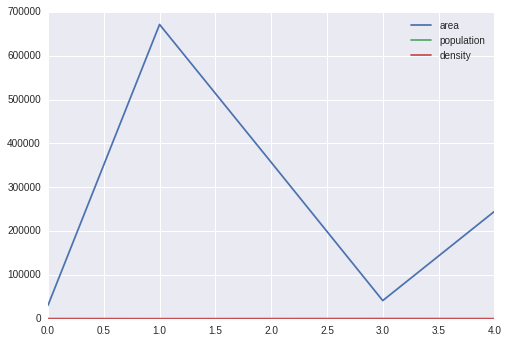

In [ ]:
countries.plot()

However, for this dataset, it does not say that much:

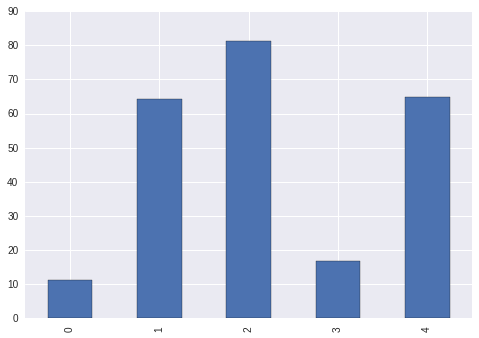

In [ ]:
countries['population'].plot(kind='bar')

You can play with the `kind` keyword: 'line', 'bar', 'hist', 'density', 'area', 'pie', 'scatter', 'hexbin'

## Importing and exporting data

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* ...

In [ ]:
pd.read

In [ ]:
states.to

## Other features

* Working with missing data (`.dropna()`, `pd.isnull()`)
* Merging and joining (`concat`, `join`)
* Grouping: `groupby` functionality
* Reshaping (`stack`, `pivot`)
* Time series manipulation (resampling, timezones, ..)
* Easy plotting

There are many, many more interesting operations that can be done on Series and DataFrame objects, but rather than continue using this toy data, we'll instead move to a real-world example, and illustrate some of the advanced concepts along the way.

See the next notebooks!

## Acknowledgement

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> This notebook is partly based on material of Jake Vanderplas (https://github.com/jakevdp/OsloWorkshop2014).

---